[*********************100%***********************]  2 of 2 completed


<Axes: title={'center': 'Crude Oil Futures vs ExxonMobil Stock Prices'}, xlabel='Date'>

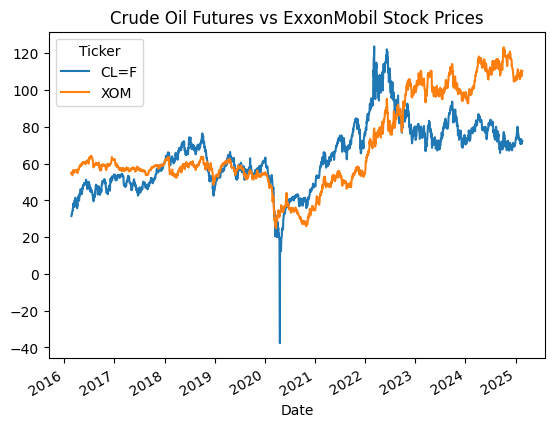

In [11]:
import yfinance as yf
import pandas as pd
import numpy as np

# Crude Oil and ExxonMobil
tickers = ['CL=F', 'XOM']
data = yf.download(tickers, start="2016-02-20", end="2025-02-20", auto_adjust=False)['Adj Close']

data = data.dropna()

data.plot(title='Crude Oil Futures vs ExxonMobil Stock Prices')

<Axes: title={'center': 'Z-Scores of ExxonMobil vs Crude Oil Price Ratio'}, xlabel='Date'>

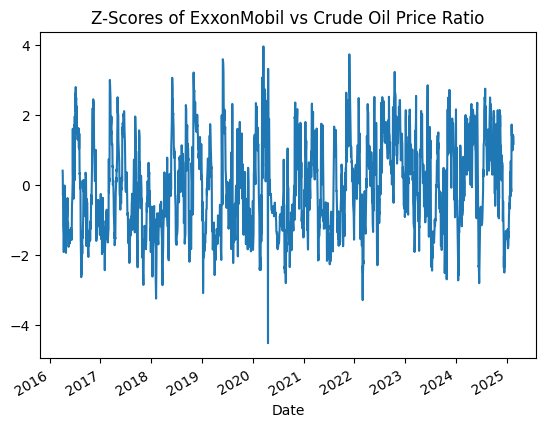

In [12]:
price_ratio = data['XOM'] / data['CL=F']

rolling_mean = price_ratio.rolling(window=30).mean()
rolling_std = price_ratio.rolling(window=30).std()

z_scores = (price_ratio - rolling_mean) / rolling_std

z_scores.plot(title='Z-Scores of ExxonMobil vs Crude Oil Price Ratio')

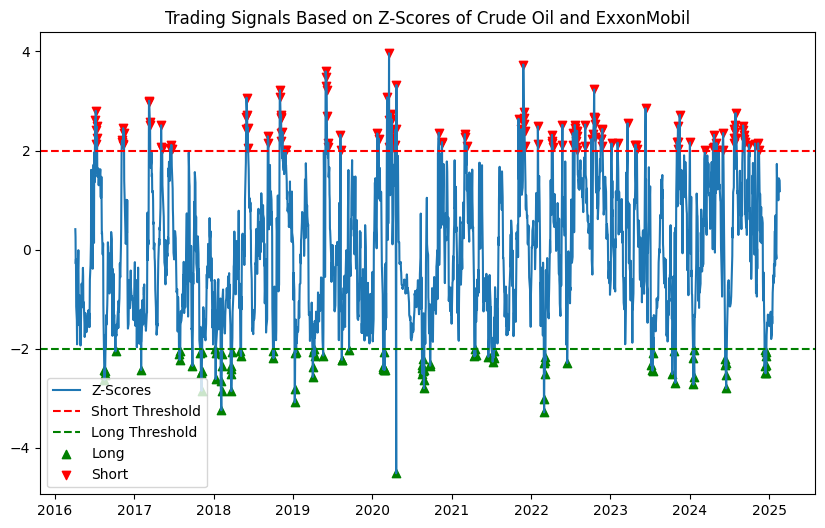

In [13]:
z_threshold = 2  # Assumed Threshold for mean-reversion signal

signals = np.where(z_scores > z_threshold, -1, np.where(z_scores < -z_threshold, 1, 0))

signals_df = pd.DataFrame(signals, index=z_scores.index, columns=['Signal'])

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(z_scores, label='Z-Scores')
plt.axhline(z_threshold, color='red', linestyle='--', label='Short Threshold')
plt.axhline(-z_threshold, color='green', linestyle='--', label='Long Threshold')
plt.scatter(signals_df[signals_df['Signal'] == 1].index, z_scores[signals_df['Signal'] == 1], color='green', label='Long', marker='^')
plt.scatter(signals_df[signals_df['Signal'] == -1].index, z_scores[signals_df['Signal'] == -1], color='red', label='Short', marker='v')
plt.legend()
plt.title('Trading Signals Based on Z-Scores of Crude Oil and ExxonMobil')
plt.show()

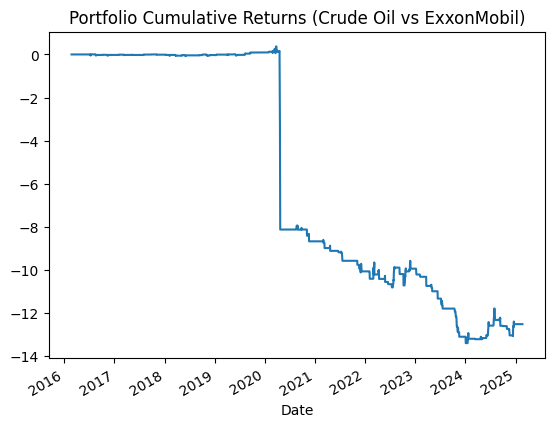

Sharpe Ratio: -0.07
Win/Loss Ratio: 1.13


In [14]:
returns = data.pct_change().dropna()

# assuming we are fully investing in the ratio
portfolio_returns = (signals_df.shift(1)['Signal'] * (returns['XOM'] - returns['CL=F']))

cumulative_returns = (1 + portfolio_returns).cumprod() - 1

cumulative_returns.plot(title='Portfolio Cumulative Returns (Crude Oil vs ExxonMobil)')
plt.show()

sharpe_ratio = np.sqrt(252) * portfolio_returns.mean() / portfolio_returns.std()
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

wins = (portfolio_returns > 0).sum()
losses = (portfolio_returns < 0).sum()
win_loss_ratio = wins / losses
print(f"Win/Loss Ratio: {win_loss_ratio:.2f}")

## Risk Management

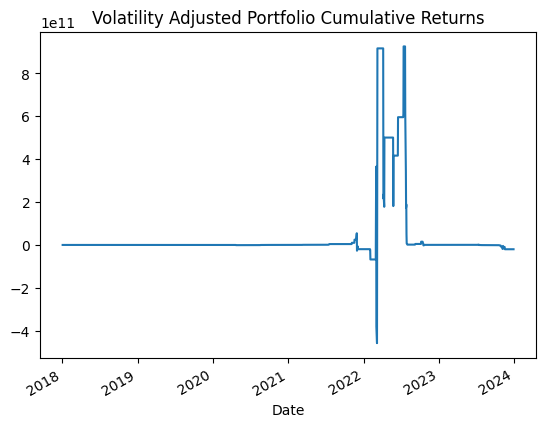

In [13]:
volatility = returns['XOM'].rolling(window=30).std()

# risk-parity approach
position_size = 1 / volatility
position_size = position_size.shift(1).fillna(0)

adjusted_portfolio_returns = portfolio_returns * position_size
cumulative_adjusted_returns = (1 + adjusted_portfolio_returns).cumprod() - 1

cumulative_adjusted_returns.plot(title='Volatility Adjusted Portfolio Cumulative Returns')
plt.show()